GY   -0.0344
dtype: float64
                   T
0    1646319368.1900
1    1646319368.4100
2    1646319368.6200
3    1646319368.8200
4    1646319369.0300
...              ...
1495 1646319670.8000
1496 1646319670.9800
1497 1646319671.1700
1498 1646319671.3600
1499 1646319671.5500

[1500 rows x 1 columns]
GY   -0.0172
dtype: float64


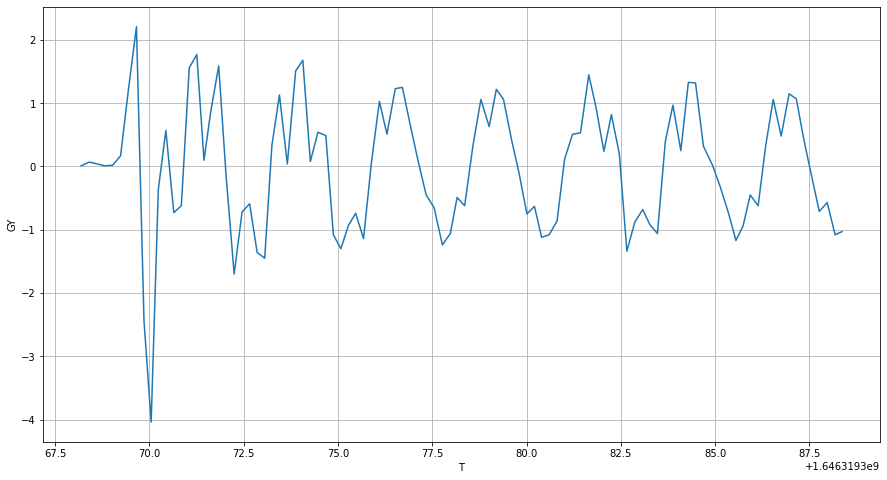

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.optimize import curve_fit


'''VARIABLES'''

E1 = 'E1'
E2 = 'E2'
E3 = 'E3'
E4 = 'E4'
E5 = 'E5'
Time = 'T'            # nb. relevant gyroscope axis = Y, relevant acc axes = X, Z
AX = 'AX'
AY = 'AY'
AZ = 'AZ'
GX = 'GX'
GY = 'GY'
GZ = 'GZ'

file_path = r'C:\Users\Ellie\Desktop\third year\Group studies\Ellie_code_test1.csv'
# use the same file path as the one defined in the Nao connection - write the CSV during start up and read out after, eg., 20s

Ni = 0
Nf = 100 # number of points analysed (not seconds)
# nb. frequency of acceleration measurements = 100 Hz, f of gyroscope measurements = 200 Hz

C = [E1, E2, E3, E4, E5, Time, XAcc, YAcc, ZAcc, XGyro, YGyro, ZGyro] # all column headings in data set

column = YGyro # column of interest

pd.options.display.float_format = '{:.4f}'.format # decimal accuracy of mean/standard deviation


''' DEFINITIONS '''

def get_dataframe(file_path):
    d = pd.read_csv(file_path, header=None, names=C)
    return d

def get_column(file_path, column):
    d = pd.read_csv(file_path, header=None, names=C)
    col = pd.DataFrame(d, columns = [column])
    return col

def std(file_path, column, N):
    d = pd.read_csv(file_path, header=None, names=C)
    col = pd.DataFrame(d, columns = [column])
    std = np.std(col[:N])
    return std

def mean(file_path, column, N):
    d = pd.read_csv(file_path, header=None, names=C)
    col = pd.DataFrame(d, columns = [column])
    mean = np.mean(col[:N])
    return mean

def graph(column1, column2, N):
    col1 = np.array(get_column(file_path, column1))[:N]
    col2 = np.array(get_column(file_path, column2)[:N])
    plt.figure(figsize=(15,8))
    plt.grid()
    plt.xlabel(column1)
    plt.ylabel(column2)
    return plt.plot(col1, col2)


''' TESTS '''

#d = get_dataframe(file_path)
c = get_column(file_path, Time)
m = mean(file_path, column, Nf)

#print(d)
print(c)
print(m)
print(m*2) # checking operations

graph(Time, YGyro, Nf)